In [13]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## 1.1 Charger les données

In [14]:
data = pd.read_csv('villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [15]:
X.shape

(32, 12)

In [16]:
labels.shape

(32,)

In [30]:
labels

array(['ajac', 'ange', 'ango', 'besa', 'biar', 'bord', 'bres', 'cler',
       'dijo', 'embr', 'gren', 'lill', 'limo', 'lyon', 'mars', 'mont',
       'nanc', 'nant', 'nice', 'nime', 'orle', 'pari', 'perp', 'reim',
       'renn', 'roue', 'stqu', 'stra', 'toul', 'tlse', 'tour', 'vich'],
      dtype=object)

## 1.2 Réduction de dimension PCA

In [17]:
# Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

In [19]:
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
num_axes = len(cumulative_variance_ratio[cumulative_variance_ratio < 0.9]) + 1
print("Nombre d'axes pour conserver 90% de l'information :", num_axes)
pca.explained_variance_ratio_

Nombre d'axes pour conserver 90% de l'information : 2


array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

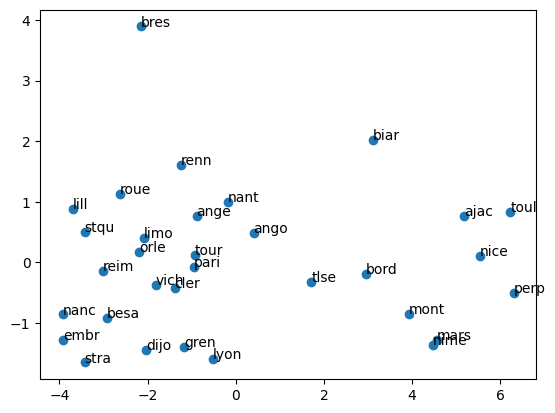

In [20]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])

for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## 2.1 Charger les données

In [25]:
data_crime = pd.read_csv('crimes.csv', sep=';')
X_crime = data_crime.iloc[:, 1:7].values
labels_crime = data_crime.iloc[:, 0].values

In [27]:
X_crime_standardized = scaler.fit_transform(X_crime)
pca = PCA()
X_crime_pca = pca.fit_transform(X_crime_standardized)
pca.explained_variance_ratio_

array([0.63698553, 0.17606859, 0.08101992, 0.04689937, 0.03709174,
       0.02193486])

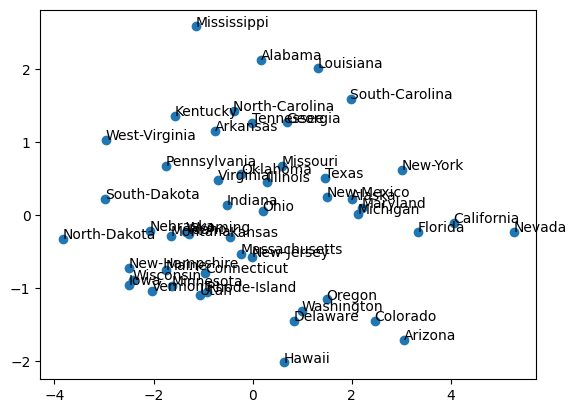

In [32]:
plt.scatter(X_crime_pca[:, 0], X_crime_pca[:, 1])

for label, x, y in zip(labels_crime, X_crime_pca[:, 0], X_crime_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## 3. Charger les données

In [33]:
data_startups = pd.read_csv('50_Startups.csv', sep=';')
X_startups = data_startups.iloc[:, 1:7].values
labels_startups = data_crime.iloc[:, 0].values

In [35]:
X_startups_standardized = scaler.fit_transform(X_startups)
X_startups_pca = pca.fit_transform(X_startups_standardized)
pca.explained_variance_ratio_

array([0.66804393, 0.25484695, 0.07063561, 0.00647351])

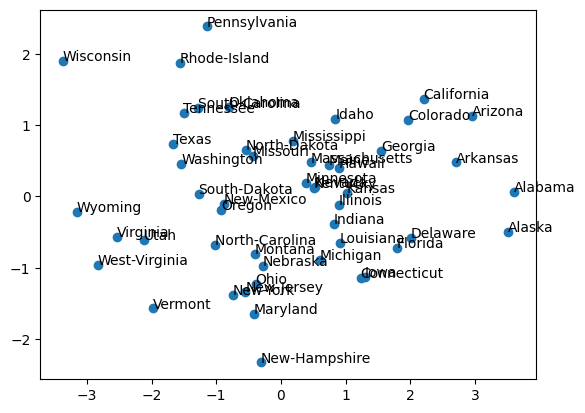

In [36]:
plt.scatter(X_startups_pca[:, 0], X_startups_pca[:, 1])

for label, x, y in zip(labels_startups, X_startups_pca[:, 0], X_startups_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

# Clustering

### Kmeans cluster

In [42]:
import os
from sklearn.cluster import KMeans

n_cores = 2 
os.environ['JOBLIB_NUMEXPR_NUM_THREADS'] = str(n_cores)
clustering = KMeans(n_clusters=3, random_state=0, n_init="auto")
clustering.fit(X_pca)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [47]:
clustering.cluster_centers_

array([[-0.85661824,  0.31432418,  0.10401758,  0.03056693,  0.05838616,
        -0.01912679,  0.002935  , -0.00795823, -0.00634756,  0.00236805,
         0.00025577,  0.00161516],
       [ 4.69981613, -0.05315433, -0.03162114, -0.00409019, -0.02097431,
         0.0024205 , -0.00741016,  0.00050072,  0.00512947,  0.00049984,
        -0.00062273,  0.00006301],
       [-3.11623081, -0.36078254, -0.10676383, -0.03605584, -0.05702512,
         0.02268638,  0.00285365,  0.00989506,  0.0036353 , -0.00352832,
         0.00022796, -0.00215642]])

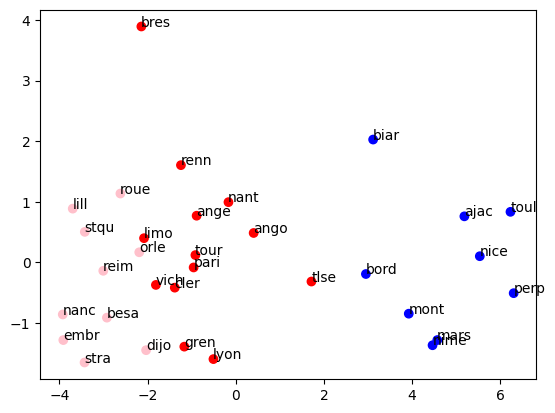

In [49]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering.labels_, cmap=matplotlib.colors.ListedColormap(colors))

for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
plt.show()

### Agglomerative Clustering

In [57]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_pca)

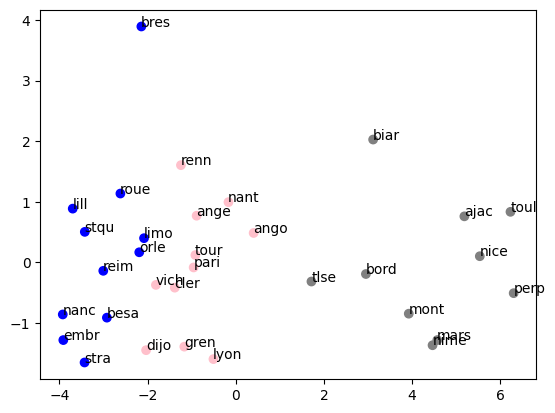

In [58]:
colors = ['grey','purple','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering.labels_, cmap=matplotlib.colors.ListedColormap(colors))

for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
plt.show()

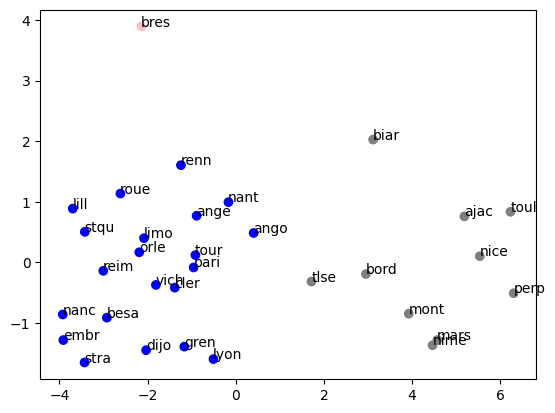

In [59]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_pca)
colors = ['grey','purple','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering.labels_, cmap=matplotlib.colors.ListedColormap(colors))

for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
plt.show()

In [60]:
from sklearn import metrics
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X_pca)
    print(metrics.silhouette_score(X_pca, clustering,metric='euclidean'))
    print()

0.625557719180767

0.3836500332030731

0.39249385306689255

0.31650377469325774

